In [1]:
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt

# Primjer 1

In [2]:
odjeli_place = pd.read_csv ("../../datasets/odjeli_place.csv")

# One way Anova

s jedne strane imamo nezavisna kategoričku varijablu, a s druge strane imamo zavisnu kontinuiranu varijablu

Problem: postoje li razlike između plaća po odjelima / postoji li nekakva asocijacija (veza) između odjela i plaće

Ne možemo koristiti korelaciju

Jesu li te razlike statistički značajne ili slučajne?

Kako izgleda statistički značajna razlika = imaju različite aritmetičke sredine

In [3]:
odjeli_place

,Unnamed: 0,Department,Salary
0,0,Marketing,52483.570765
1,1,Marketing,49308.678494
2,2,Marketing,53238.442691
3,3,Marketing,57615.149282
4,4,Marketing,48829.233126
...,...,...,...
85,85,Sales,51989.457738
86,86,Sales,60492.412706
87,87,Sales,56972.506658
88,88,Sales,51821.438777


## Ključno pitanje glasi - hoćemo li u budućim analizama uključiti Department kao varijablu koja utječe na plaću?

In [4]:
odjeli_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   Department  90 non-null     object 
 2   Salary      90 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
odjeli_place.Department.value_counts()

Department
Marketing    30
Logistics    30
Sales        30
Name: count, dtype: int64

In [6]:
odjeli_place_department = odjeli_place.groupby ("Department")
odjeli_place_department ["Salary"].mean()

Department
Logistics    44454.768884
Marketing    49059.265521
Sales        55077.308635
Name: Salary, dtype: float64

(array([ 3.,  8., 11., 12., 18., 12., 10.,  8.,  4.,  4.]),
 array([36181.48444254, 39002.12219178, 41822.75994101, 44643.39769024,
        47464.03543948, 50284.67318871, 53105.31093795, 55925.94868718,
        58746.58643642, 61567.22418565, 64387.86193488]),
 <BarContainer object of 10 artists>)

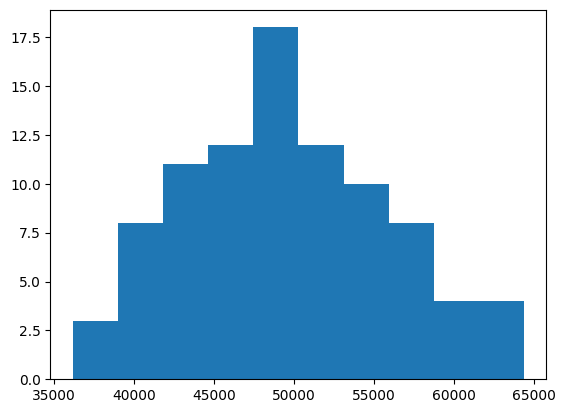

In [7]:
plt.hist (odjeli_place.Salary)

In [8]:
odjeli_place.corr(numeric_only = True)

,Unnamed: 0,Salary
Unnamed: 0,1.00000,0.34113
Salary,0.34113,1.00000


gornji kod nam govori da postoje različiti prosjeci plaća medju odjelima

zanima nas je li to čista slučajnost (eto tako ispao uzorak) ili postoji neka poveznica - korelacija nam ništa ne govori

In [9]:
marketing = odjeli_place[odjeli_place['Department'] == 'Marketing']['Salary']
logistics = odjeli_place[odjeli_place['Department'] == 'Logistics']['Salary']
sales = odjeli_place[odjeli_place['Department'] == 'Sales']['Salary']

### Krećeno s Anova analizom

Grupirali smo plaće u tri zasebne varijable, izdvaja u varijablu marketing samo odjel marketing i njihove plaće, u varijablu logistics samo odjel logistike i njihove plaće itd

Napomena: radimo s grupiranim podacima pa se ne moramo zamarati s pretvaranjem kategoričkih podataka u brojčane

In [10]:
logistics

30    42292.320245
31    53335.251830
32    44939.262489
33    40240.300820
34    48701.452104
35    39506.203575
36    45939.886178
37    36181.484443
38    39023.162780
39    45885.875561
40    48323.099610
41    45771.157265
42    44479.582729
43    43645.033370
44    38346.651043
45    41760.701062
46    42927.125531
47    49757.050018
48    46546.282303
49    37066.319301
50    46458.377862
51    43267.129738
52    41953.850999
53    47752.543300
54    49639.497851
55    49190.760536
56    41223.521145
57    43608.544309
58    46490.685441
59    49389.953072
Name: Salary, dtype: float64

In [11]:
marketing

0     52483.570765
1     49308.678494
2     53238.442691
3     57615.149282
4     48829.233126
5     48829.315215
6     57896.064078
7     53837.173646
8     47652.628070
9     52712.800218
10    47682.911536
11    47671.351232
12    51209.811358
13    40433.598777
14    41375.410837
15    47188.562354
16    44935.844398
17    51571.236663
18    45459.879622
19    42938.481493
20    57328.243845
21    48871.118498
22    50337.641023
23    42876.259069
24    47278.086377
25    50554.612949
26    44245.032113
27    51878.490092
28    46996.806550
29    48541.531251
Name: Salary, dtype: float64

In [12]:
F_statistic, p_value = stats.f_oneway(marketing, logistics, sales)

Korištenjem metode Anova, radimo dva statistička izračuna i dobivamo dvije varijable, F_statistics i p_value

In [13]:
F_statistic

np.float64(34.873805599251384)

In [14]:
p_value

np.float64(7.548262426790077e-12)

Kako protumačiti vrijednost F_statistic vrijednosti:

Nikad ne može biti manja od nule

F_statistic = 0 : nema razlike u varijanci između grupa, to su iste grupe doslovce po svojim obilježjima

F_statistic između 0 i 1 : grupe su slične

F_statistic > 1 (najčešće do 10) : postoje značajne razlike između grupa

U ovom našem primjeru postoje značajne razlike između grupnih prosjeka (34,87)

Velika F-statistika (kao što je 34.87) znači da su razlike između odjela mnogo veće nego razlike unutar odjela.

p_value nam pomaže odrediti radi li se o slučajnom događaju ili o trendu / pravilu

Kriterij je da p_value mora biti manja od 0,05

U našem slučaju p_value iznosi 0,754 * 10 na -12 što je definitivno manje od 0,05 ---> ova situacija nije slučajna, statistički je značajna i možemo potvrditi F_statistics

### Hoćemo li u budućim analizama uključiti Department kao varijablu koja utječe na plaću?
### Da, yes, oui, obavezno!

# Zadatak 1

In [15]:
import pandas as pd
import numpy as np
from scipy import stats

Postoje li razlike između ove dvije grupe (po spolu) u odnosu na frekvenciju vežbanja?

In [16]:
gender_vjezba = pd.read_csv ("gender_vjezba.csv")
gender_vjezba

,Unnamed: 0,Gender,ExerciseFrequency
0,0,Male,6.745071
1,1,Male,5.792604
2,2,Male,6.971533
3,3,Male,8.284545
4,4,Male,5.648770
...,...,...,...
195,195,Female,6.077976
196,196,Female,4.174214
197,197,Female,5.730588
198,198,Female,5.587313


In [17]:
gendspol = gender_vjezba.groupby ("Gender")
gendspol ["ExerciseFrequency"].mean()

Gender
Female    5.533457
Male      5.844230
Name: ExerciseFrequency, dtype: float64

In [18]:
male = gender_vjezba[gender_vjezba['Gender'] == 'Male']['ExerciseFrequency']
female = gender_vjezba[gender_vjezba['Gender'] == 'Female']['ExerciseFrequency']

In [19]:
F_statistic, p_value = stats.f_oneway(male, female)

In [20]:
F_statistic

np.float64(2.4750968599505234)

In [21]:
p_value

np.float64(0.11725885247920977)